<a href="https://colab.research.google.com/github/Sabrinapearlpervez/Wine-Class-Id-Predictions/blob/main/Wine_Class_Id_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
from seaborn import heatmap

In [164]:
path = '/content/wine.data'

In [165]:
df = pd.read_csv(path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [166]:
df = df.rename(columns={0: "Class Id", 1:"Alcohol", 2:"Malic Acid", 3:"Ash", 4:"Alcalinity Ash", 5:"Magnesium", 6:"Total Phenols", 
                        7:"Flavanoids", 8:"Non-Flavanoid Phenols", 9:"Proanthocyanins", 10:"Color Intensity", 11:"Hue", 12:"OD280 OD315 DWines", 
                        13:	"Proline"})
df
#renaming columns without names

,Class Id,Alcohol,Malic Acid,Ash,Alcalinity Ash,Magnesium,Total Phenols,Flavanoids,Non-Flavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 OD315 DWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [167]:
df.duplicated().sum()
#checking for duplicates

0

In [168]:
df.isna().sum()
#checking for missing values

Class Id                 0
Alcohol                  0
Malic Acid               0
Ash                      0
Alcalinity Ash           0
Magnesium                0
Total Phenols            0
Flavanoids               0
Non-Flavanoid Phenols    0
Proanthocyanins          0
Color Intensity          0
Hue                      0
OD280 OD315 DWines       0
Proline                  0
dtype: int64

In [169]:
df.describe()
#summary stats of the dataframe

,Class Id,Alcohol,Malic Acid,Ash,Alcalinity Ash,Magnesium,Total Phenols,Flavanoids,Non-Flavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 OD315 DWines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [170]:
df.info()
#checking for dtypes and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Class Id               178 non-null    int64  
 1   Alcohol                178 non-null    float64
 2   Malic Acid             178 non-null    float64
 3   Ash                    178 non-null    float64
 4   Alcalinity Ash         178 non-null    float64
 5   Magnesium              178 non-null    int64  
 6   Total Phenols          178 non-null    float64
 7   Flavanoids             178 non-null    float64
 8   Non-Flavanoid Phenols  178 non-null    float64
 9   Proanthocyanins        178 non-null    float64
 10  Color Intensity        178 non-null    float64
 11  Hue                    178 non-null    float64
 12  OD280 OD315 DWines     178 non-null    float64
 13  Proline                178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [171]:
class_id = df['Class Id'].value_counts()
class_id

2    71
1    59
3    48
Name: Class Id, dtype: int64

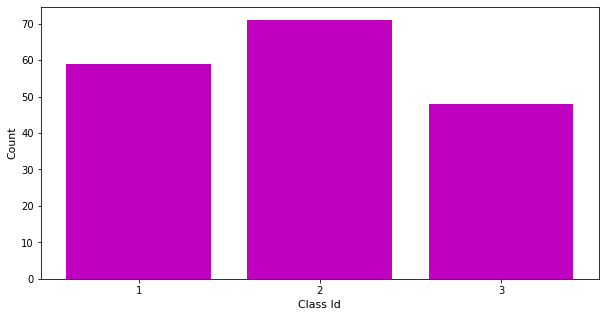

In [172]:
ids = {'1':59, '2':71, '3':48}
keys = list(ids.keys())
values = list(ids.values())

fig = plt.figure(figsize=(10,5));

plt.bar(keys, values, color='m');
plt.xlabel("Class Id", fontsize=11);
plt.ylabel("Count", fontsize=11);
#bar graph of the class ids 

In [173]:
corr = df.corr()
corr

,Class Id,Alcohol,Malic Acid,Ash,Alcalinity Ash,Magnesium,Total Phenols,Flavanoids,Non-Flavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280 OD315 DWines,Proline
Class Id,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Non-Flavanoid Phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


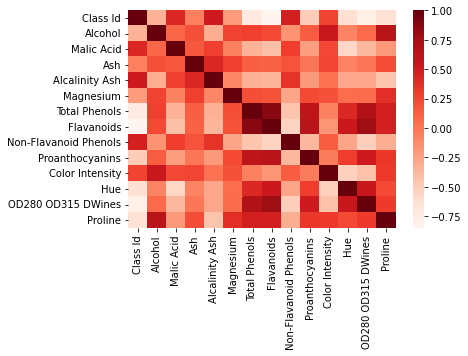

In [174]:
sns.heatmap(corr, cmap='Reds');
#Heatmap of the correlation of all the columns

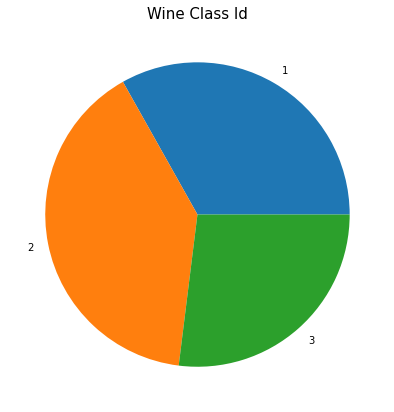

In [175]:
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = keys);
plt.title('Wine Class Id', fontsize=15);
#Took the values and keys from the bar graph
#Pie Chart of the Type of Wine
#Class Id 2 is the most popular in this df

In [176]:
fig = go.Figure(data=[go.Table(header=dict(values=['Class Id', 'Alcohol']),
                 cells=dict(values=(df['Class Id'], df['Alcohol'])))
                     ])
fig.show()
#Class Id and the amount of alcohol in them.

In [177]:
target = 'Class Id'
X = df.drop(columns=target, axis=1)
y = df[target]
#assigning the target

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#train test split

In [179]:
num_selector = make_column_selector(dtype_include='number')

In [180]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
#Simple Imputer 

In [181]:
scaler = StandardScaler()

In [182]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe
#pipeline for numeric data

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [183]:
number_tuple = (numeric_pipe, num_selector)

In [184]:
preprocessor = make_column_transformer(number_tuple)
preprocessor
#preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f067d85a050>)])

In [185]:
dec = DecisionTreeClassifier(random_state=42, max_depth=2)

In [186]:
dec.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [187]:
dec_tree_pipe = make_pipeline(preprocessor, dec)
#decision tree pipeline

In [188]:
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f067d85a050>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])

In [189]:
dec_preds = dec_tree_pipe.predict(X_test)
#decision tree predictions

In [190]:
train_score = dec_tree_pipe.score(X_train, y_train)
test_score = dec_tree_pipe.score(X_test, y_test)
print(train_score)
print(test_score)
#training and testing score for the dec tree model

0.9398496240601504
0.8666666666666667


In [191]:
dec_tree_acc = accuracy_score(y_test, dec_preds)
dec_tree_acc
#accuracy score for the dec tree model

0.8666666666666667

In [192]:
dec_tree_clf_report = classification_report(y_test, dec_preds)
print(dec_tree_clf_report)
#classification report for the dec tree model

              precision    recall  f1-score   support

           1       0.74      0.93      0.82        15
           2       0.93      0.78      0.85        18
           3       1.00      0.92      0.96        12

    accuracy                           0.87        45
   macro avg       0.89      0.88      0.88        45
weighted avg       0.89      0.87      0.87        45



In [193]:
dec2 = DecisionTreeClassifier(random_state=42, max_depth=6)

In [194]:
dec_tree_pipe2 = make_pipeline(preprocessor, dec2)
#decision tree with a different max depth

In [195]:
dec_tree_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f067d85a050>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [196]:
dec_preds2 = dec_tree_pipe2.predict(X_test)
#decision tree 2 predictions

In [197]:
train_score2 = dec_tree_pipe2.score(X_train, y_train)
test_score2 = dec_tree_pipe2.score(X_test, y_test)
print(train_score2)
print(test_score2)
#training and testing score for the dec tree model 2

1.0
0.9555555555555556


In [198]:
dec_tree_acc2 = accuracy_score(y_test, dec_preds2)
dec_tree_acc2
#accuracy score for the dec tree model 2

0.9555555555555556

In [199]:
dec_tree_clf_report2 = classification_report(y_test, dec_preds2)
print(dec_tree_clf_report2)
#classification report for the dec tree model 2

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       0.95      1.00      0.97        18
           3       1.00      0.92      0.96        12

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [200]:
pca = PCA(n_components = .95)
pca_preprocessor = make_pipeline(scaler, pca, dec2)
#preprocesser with pca on dec tree model 2

In [201]:
pca_preprocessor.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [202]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train:', classification_report(y_train, model.predict(X_train)))
  print('Test:', classification_report(y_test, model.predict(X_test)))

  CM = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(12, 10))
  heatmap(CM, annot=True, cmap='Oranges')
  plt.xlabel('Predicted', fontsize=15)
  plt.ylabel('True', fontsize=15)
  plt.show()
  #classification report for dec tree model 2 with pca

Train:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        36

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133

Test:               precision    recall  f1-score   support

           1       0.93      0.87      0.90        15
           2       0.89      0.89      0.89        18
           3       0.92      1.00      0.96        12

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



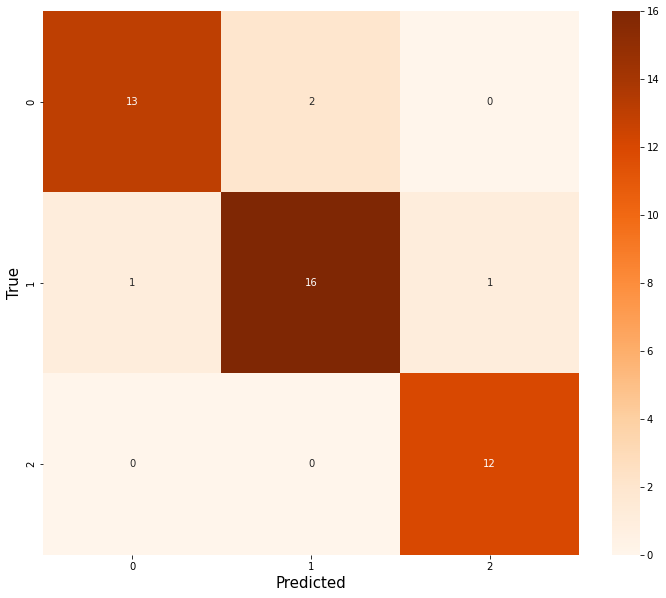

In [203]:
eval_classification(pca_preprocessor, X_train, X_test, y_train, y_test)

In [204]:
knn = KNeighborsClassifier()

In [205]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [206]:
KNN_pipe = make_pipeline(preprocessor, knn)
KNN_pipe.fit(X_train, y_train)
#knn model pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f067d85a050>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [207]:
KNN_preds = KNN_pipe.predict(X_test)

In [208]:
training_scores = KNN_pipe.score(X_train, y_train)
testing_scores = KNN_pipe.score(X_test, y_test)
print(training_scores)
print(testing_scores)
#training and testing score for knn model 

0.9774436090225563
0.9555555555555556


In [209]:
KNN_acurracy = KNN_pipe.score(X_test, y_test)
KNN_acurracy
#accurracy score for knn model

0.9555555555555556

In [210]:
KNN_clf_report = classification_report(y_test, KNN_preds)
print(KNN_clf_report)
#classification report for knn model

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94        18
           3       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [211]:
knn2 = KNeighborsClassifier(n_neighbors=9, p=2)
#knn model 2 with tuning the n_neighbors

In [212]:
KNN_pipe2 = make_pipeline(preprocessor, knn2)
KNN_pipe2.fit(X_train, y_train)
#pipeline for knn model 2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f067d85a050>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [213]:
KNN_preds2 = KNN_pipe2.predict(X_test)
#knn model 2 predictions

In [214]:
training_scores2 = KNN_pipe2.score(X_train, y_train)
testing_scores2 = KNN_pipe2.score(X_test, y_test)
print(training_scores2)
print(testing_scores2)
#training and testing score for knn model 2 

0.9774436090225563
0.9777777777777777


In [215]:
knn_acc2 = accuracy_score(y_test, KNN_preds2)
knn_acc2
#accuracy score for the knn model 2

0.9777777777777777

In [216]:
KNN_clf_report2 = classification_report(y_test, KNN_preds2)
print(KNN_clf_report2)
#classification report for knn model 2 

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [225]:
pca_preprocessor2 = make_pipeline(scaler, pca, knn2)
#pca preprocessor for knn model 2

In [226]:
pca_preprocessor2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

Train:               precision    recall  f1-score   support

           1       0.96      1.00      0.98        44
           2       1.00      0.92      0.96        53
           3       0.95      1.00      0.97        36

    accuracy                           0.97       133
   macro avg       0.97      0.97      0.97       133
weighted avg       0.97      0.97      0.97       133

Test:               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



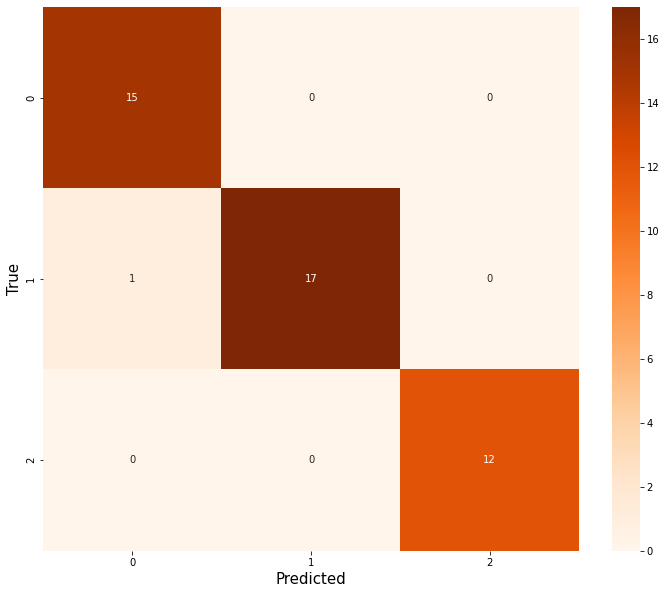

In [227]:
eval_classification(pca_preprocessor2, X_train, X_test, y_train, y_test)
#classification report with pca for knn model 2

The model that would perform the best would be the knn model 2 with the pca at .95, n_neighbors at 9, and p at 2. The classification report on the training and testing set is almost perfect. The precision, recall, and f1-score are high on both the testing and training set, all close to 1. This model would do extremely well with the least amount of errors. 